# Exercise-3: Support Vector Machines (SVM) 
## Q3.1 
Train a linear SVM (kernel="linear") and evaluate on validation sets (use the
original 5 splits that was created in previous exercise). Report accuracy mean, std
and plot the ROC for each split. 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, auc

# Load dataset
df = pd.read_csv("../archive/data.csv")
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

X = df.drop(columns=['diagnosis'])
y = df['diagnosis'].map({'M':1, 'B':0})

# Standardize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)


In [26]:

# 5-fold Stratified CV
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

for train_idx, val_idx in kf.split(X_std, y):
    X_tr, X_val_split = X_std[train_idx], X_std[val_idx]
    y_tr, y_val_split = y.values[train_idx], y.values[val_idx]
    
    clf = SVC(kernel="linear", probability=True, random_state=42)
    clf.fit(X_tr, y_tr)
    
    y_pred = clf.predict(X_val_split)
    accuracies.append(accuracy_score(y_val_split, y_pred))

print(f"Validation Accuracy Mean: {np.mean(accuracies):.4f}") 
print(f"Validation Accuracy Std: {np.std(accuracies):.4f}")

Validation Accuracy Mean: 0.9754
Validation Accuracy Std: 0.0195


### Plotting the ROC for each split: 

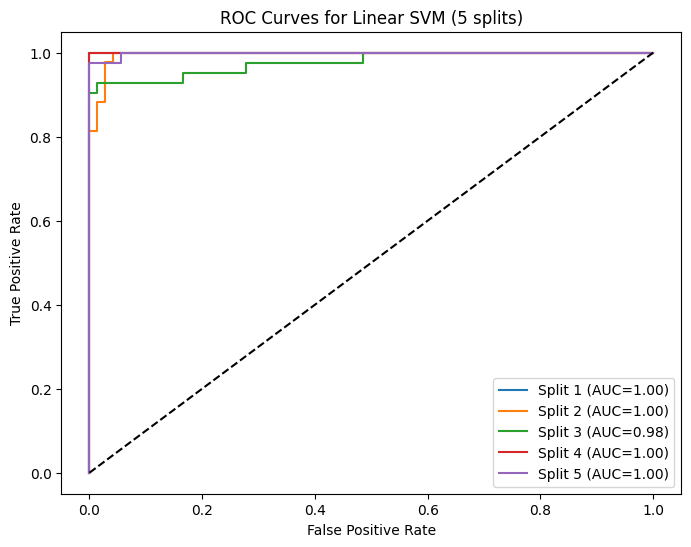

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))

for i, (train_idx, val_idx) in enumerate(kf.split(X_std, y), 1):
    X_tr, X_val_split = X_std[train_idx], X_std[val_idx]
    y_tr, y_val_split = y.values[train_idx], y.values[val_idx]
    
    clf = SVC(kernel="linear", probability=True, random_state=42)
    clf.fit(X_tr, y_tr)
    
    y_prob = clf.predict_proba(X_val_split)[:,1]
    fpr, tpr, _ = roc_curve(y_val_split, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Split {i} (AUC={roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Linear SVM (5 splits)')
plt.legend()
plt.show()


## Q3.2 Train an Radial Basis Function (RBF) kernel SVM. Compare its performance to the linear kernel using validation accuracy. Plot ROC for these models. 

compare validation accuracy of Linear vs RBF SVM

In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

linear_acc, rbf_acc = [], []

for train_idx, val_idx in kf.split(X_std, y):
    X_tr, X_val_split = X_std[train_idx], X_std[val_idx]
    y_tr, y_val_split = y.values[train_idx], y.values[val_idx]
    
    # Linear SVM
    clf_lin = SVC(kernel="linear", probability=True, random_state=42)
    clf_lin.fit(X_tr, y_tr)
    linear_acc.append(accuracy_score(y_val_split, clf_lin.predict(X_val_split)))
    
    # RBF SVM
    clf_rbf = SVC(kernel="rbf", probability=True, random_state=42)
    clf_rbf.fit(X_tr, y_tr)
    rbf_acc.append(accuracy_score(y_val_split, clf_rbf.predict(X_val_split)))

print(f"Linear SVM Accuracy: {np.mean(linear_acc):.4f} ± {np.std(linear_acc):.4f}")
print(f"RBF SVM Accuracy: {np.mean(rbf_acc):.4f} ± {np.std(rbf_acc):.4f}")


Linear SVM Accuracy: 0.9754 ± 0.0195
RBF SVM Accuracy: 0.9754 ± 0.0195


### Plotting ROC curves for the SVM comparison  

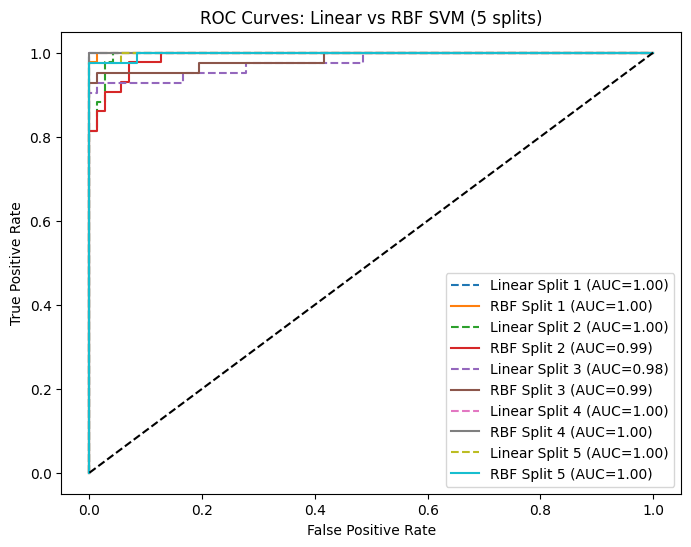

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))

for i, (train_idx, val_idx) in enumerate(kf.split(X_std, y), 1):
    X_tr, X_val_split = X_std[train_idx], X_std[val_idx]
    y_tr, y_val_split = y.values[train_idx], y.values[val_idx]
    
    # Linear SVM
    clf_lin = SVC(kernel="linear", probability=True, random_state=42)
    clf_lin.fit(X_tr, y_tr)
    y_prob_lin = clf_lin.predict_proba(X_val_split)[:,1]
    fpr, tpr, _ = roc_curve(y_val_split, y_prob_lin)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linestyle='--', label=f'Linear Split {i} (AUC={roc_auc:.2f})')
    
    # RBF SVM
    clf_rbf = SVC(kernel="rbf", probability=True, random_state=42)
    clf_rbf.fit(X_tr, y_tr)
    y_prob_rbf = clf_rbf.predict_proba(X_val_split)[:,1]
    fpr, tpr, _ = roc_curve(y_val_split, y_prob_rbf)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'RBF Split {i} (AUC={roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: Linear vs RBF SVM (5 splits)')
plt.legend()
plt.show()


In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
linear_acc, rbf_acc = [], []

for train_idx, val_idx in kf.split(X_std, y):
    X_tr, X_val_split = X_std[train_idx], X_std[val_idx]
    y_tr, y_val_split = y.values[train_idx], y.values[val_idx]
    
    # Linear SVM
    clf_lin = SVC(kernel="linear", random_state=42)
    clf_lin.fit(X_tr, y_tr)
    linear_acc.append(accuracy_score(y_val_split, clf_lin.predict(X_val_split)))
    
    # RBF SVM
    clf_rbf = SVC(kernel="rbf", random_state=42)
    clf_rbf.fit(X_tr, y_tr)
    rbf_acc.append(accuracy_score(y_val_split, clf_rbf.predict(X_val_split)))

print(f"Linear SVM Accuracy: {np.mean(linear_acc):.4f} ± {np.std(linear_acc):.4f}")
print(f"RBF SVM Accuracy: {np.mean(rbf_acc):.4f} ± {np.std(rbf_acc):.4f}")


Linear SVM Accuracy: 0.9754 ± 0.0195
RBF SVM Accuracy: 0.9754 ± 0.0195
